## 최적화 이론
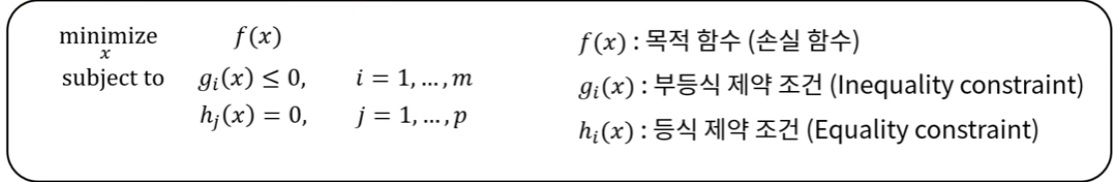
- 가능한 모든 해 중 최적의 해를 찾는 문제를 해결하는 이론
- 연속 변수와 불연속 변수에 따라 크게 둘로 나누어짐
  - 해당 강의에서는 연속 변수만 다루도록 함
- **부등식 및 등식 제약 조건을 지키면서, 목적 함수가 최소가 되게하는 x를 찾는 문제**
- 최소화 문제의 반대말은 최대화 문제(minimization problem / maximization problem)
  - f(x)에 마이너스를 붙이면 자연스럽게 maximization이 될 수도 있음
- f(x)의 형태에 따라 다양한 문제 해결 알고리즘이 있으나, 여기서는 다루지 않음
- 딥러닝에서 대부분 제약 조건은 **사용하지 않음**

## 분석적 방법 vs 수치적 방법
### 1. 분석적 방법(Analytical method)
- 함수의 **모든 구간을 수식으로 알 때 사용하는 수식적인 해석 방법**
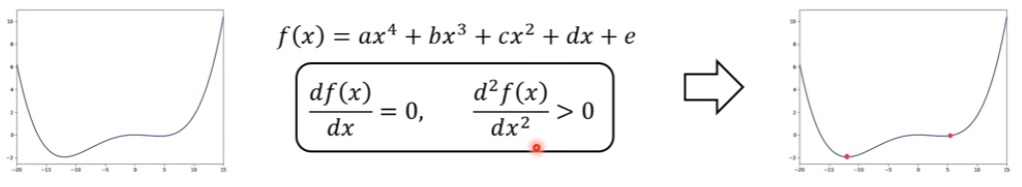
  - 미분값이 0 : 극값이 존재 / 위로 볼록, 아래로 볼록인지도 확인이 가능
  
### 2. 수치적 방법(Numerical method)
- 함수의 형태와 수식을 알지 못할때 사용하는 수치적인 방법

## Local vs Global solution
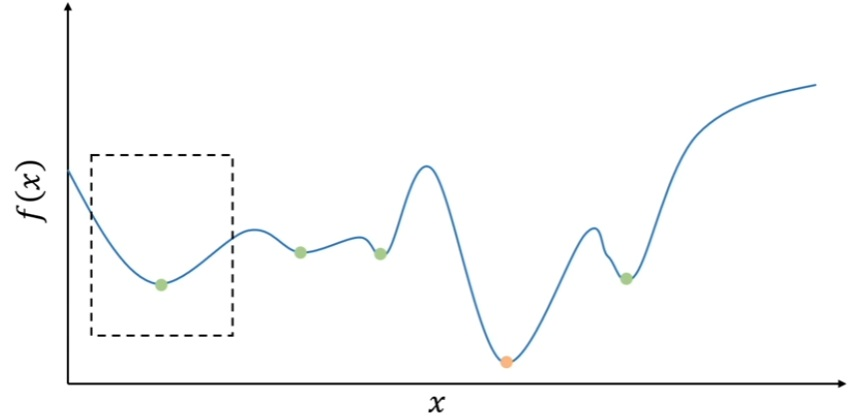
- 전역 솔루션(Global Solution)은 정의역에서 단 하나 존재한다.
- 지역 솔루션(Local Solution)은 여러개일 수 있다.
- **따라서 일반적으로 하나의 솔루션을 찾았을 때 local인지 global인지 확신할 수는 없다**

### 이를 딥러닝 관점에서 살펴보도록 하자
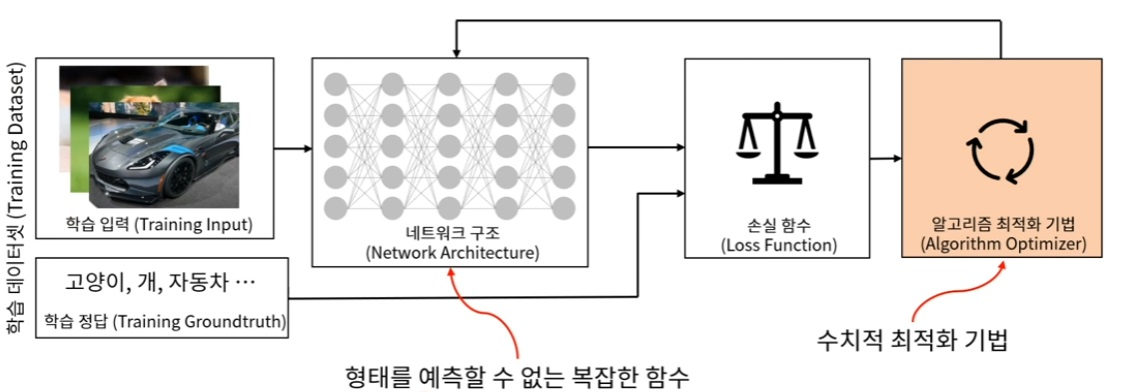
- 딥러닝 네트워크의 학습은 **손실 함수가 최소가 되게 하는 파라미터를 구하는 최적화 문제**로 볼 수 있다.

## Gradient Descent(경사하강법)

### 1. 기원 : 무차별 대입법(Brute Force)
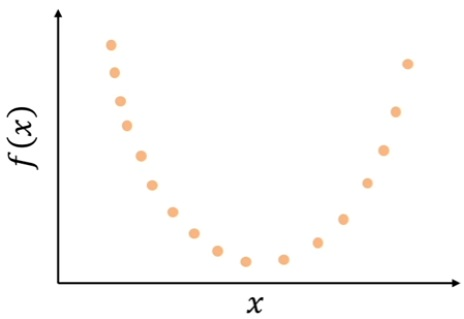
- 가능한 모든 수를 대입해보는 방법
- 가장 단순한 방법으로 함수를 알 수 있음
- 아래의 문제로 최적화에 이용할 수는 없음
  - **최적값이 존재하는 범위를 알아야 함**
  - x를 정확히 찾기 위해 **무한히 촘촘하게 조사해야 함**
  - f(x)의 **계산 복잡도가 매우 높음**

## 사전 지식 : 미분과 기울기
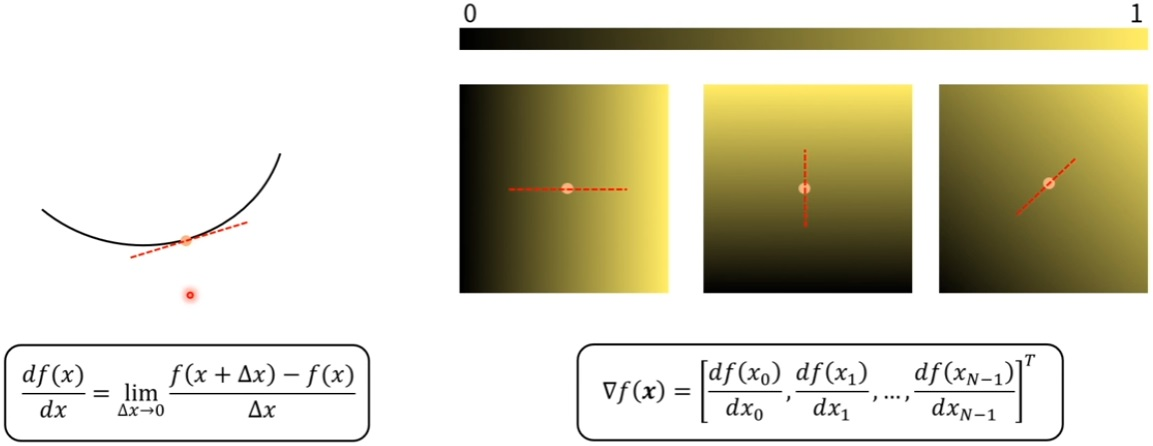
- 기울기(Gradient)는 스칼라를 벡터로 미분한 것이며, 벡터의 각 요소로 미분하면 됨

## 경사 하강법
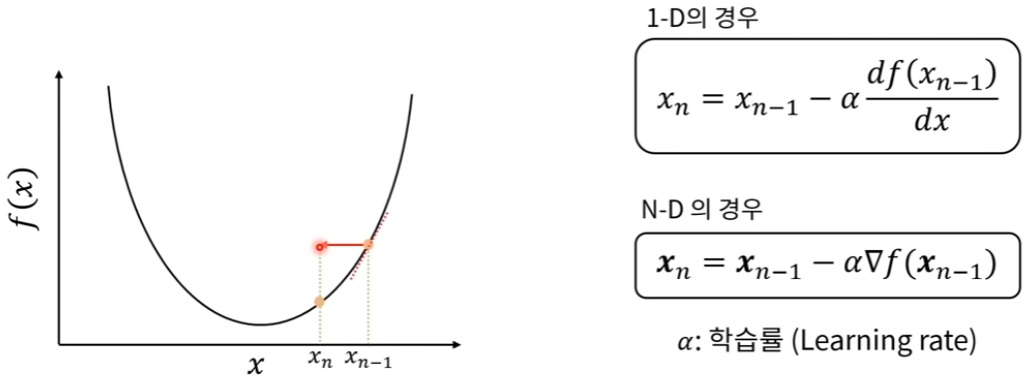
- 경사 하강법은 f(x)의 값이 **변하지 않을 때까지 스텝을 반복한다.**
  - 다만, 실제 계산에 있어 정말 작은 값이 존재할 수 있기 때문에 관용을 주어 제어함
- 이에 따른 적절한 학습률을 선택하는 것은 매우 중요하다.

## 볼록 함수
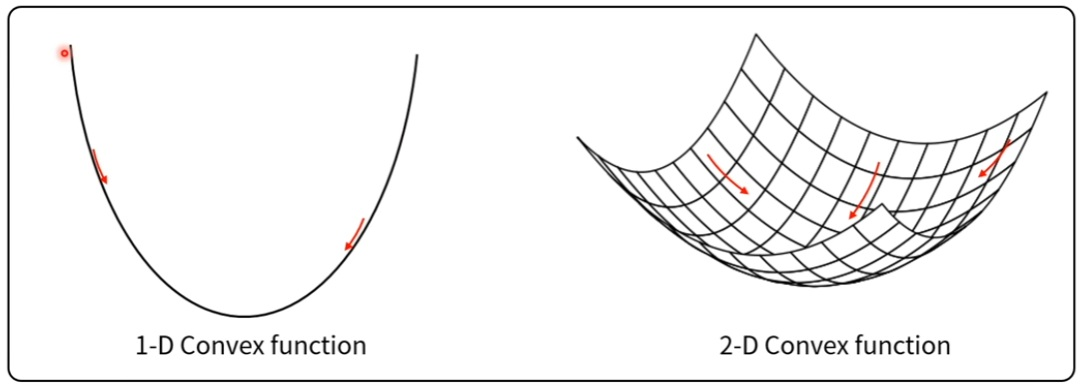
- 볼록 함수(Convex function)는 어디서 시작하더라도 경사 하강법으로 최적값에 도달할 수 있음
- 다만 현실은 녹록치않지

## 비볼록 함수
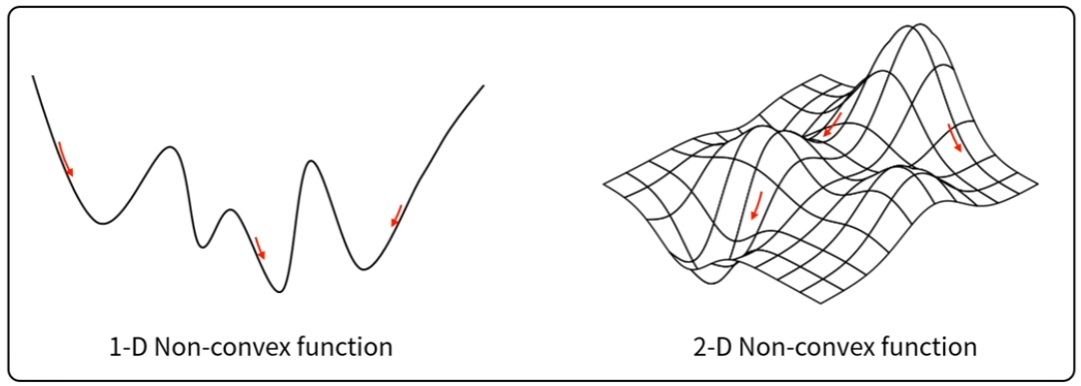
- 비볼록 함수(Non-convex function)는 시작 위치에 따라 다른 최적값을 찾는다.
  - 즉, **local minimum**에 빠질 위험이 있음